<a href="https://colab.research.google.com/github/3Abkader/algoTASK/blob/main/THE_TASK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [4]:

train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
class_names = {
  0: 'T-shirt/top',
  1: 'Trouser',
  2: 'Pullover',
  3: 'Dress',
  4: 'Coat',
  5: 'Sandal',
  6: 'Shirt',
  7: 'Sneaker',
  8: 'Bag',
  9: 'Ankle boot'}


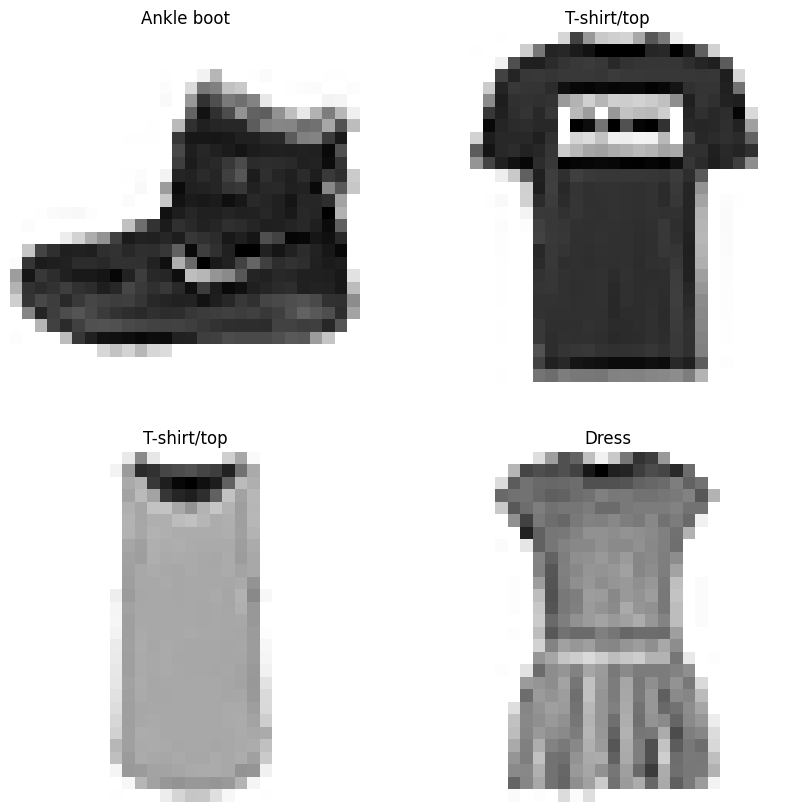

In [6]:
plt.figure(figsize=(10, 10))
for i in range(4):
  plt.subplot(2, 2, i+1)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[i]])
  plt.axis('off')
plt.show()

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [8]:
model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#step no.3
model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])


In [13]:
history = model.fit(train_images, train_labels,
    epochs=4,
    batch_size=32,
    validation_data=(test_images, test_labels))


Epoch 1/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8974 - loss: 0.2744 - val_accuracy: 0.8631 - val_loss: 0.3784
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9027 - loss: 0.2599 - val_accuracy: 0.8778 - val_loss: 0.3446
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9066 - loss: 0.2523 - val_accuracy: 0.8737 - val_loss: 0.3572
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9109 - loss: 0.2422 - val_accuracy: 0.8848 - val_loss: 0.3361


In [14]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

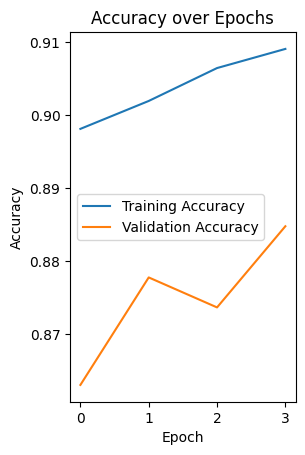

In [15]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


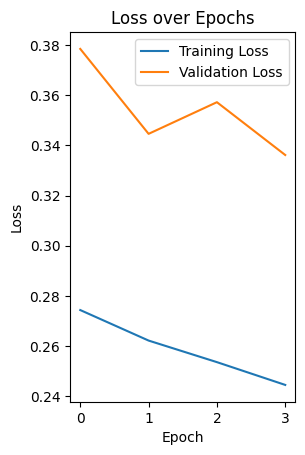

In [16]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
#step no 4
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")


313/313 - 1s - 2ms/step - accuracy: 0.8848 - loss: 0.3361

Test accuracy: 0.8848, Test loss: 0.3361


In [18]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


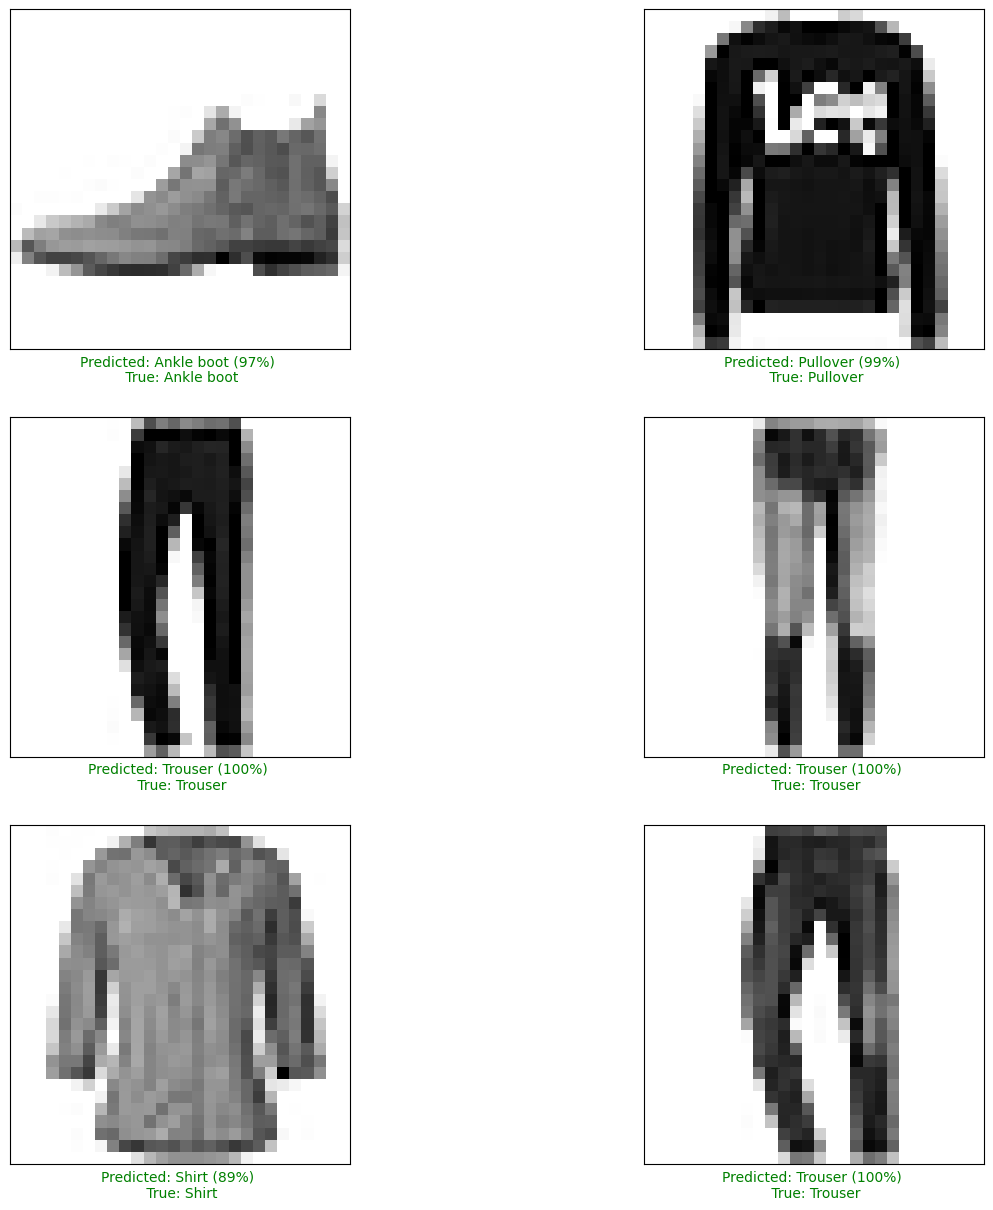

In [23]:
plt.figure(figsize=(15, 15))
for i in range(6):
    plt.subplot(3, 2, i+1)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]

    if predicted_label == true_label:
      color = 'green'
    else:
       color = 'red'

    plt.xlabel(f"Predicted: {class_names[predicted_label]} ({100*np.max(predictions[i]):2.0f}%) \n True: {class_names[true_label]}",
      color=color)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [20]:
#step no 5
improved_model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(256, activation='relu'),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])
improved_model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

improved_history = improved_model.fit(train_images, train_labels,
    epochs=6,
    batch_size=32,
    validation_data=(test_images, test_labels))


Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7880 - loss: 0.5989 - val_accuracy: 0.8441 - val_loss: 0.4145
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8678 - loss: 0.3611 - val_accuracy: 0.8505 - val_loss: 0.4070
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8813 - loss: 0.3217 - val_accuracy: 0.8661 - val_loss: 0.3706
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8856 - loss: 0.3063 - val_accuracy: 0.8735 - val_loss: 0.3516
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.8955 - loss: 0.2785 - val_accuracy: 0.8615 - val_loss: 0.3646
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8986 - loss: 0.2669 - val_accuracy: 0.8851 - val_loss: 0.3228


In [21]:
improved_test_loss, improved_test_acc = improved_model.evaluate(test_images, test_labels, verbose=2)
print(f"\nOriginal model test accuracy: {test_acc:.4f}")
print(f"Improved model test accuracy: {improved_test_acc:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.8851 - loss: 0.3228

Original model test accuracy: 0.8848
Improved model test accuracy: 0.8851
